In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
#Read in csv and create dataframe
file_path = Path("Resources/Budget/Budget_by_County_Merged.csv")

df = pd.read_csv(file_path)



df.head()

,State,County/ Congressional District,Veteran Population*,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty#,General Operating Expenses,Insurance & Indemnities,Medical Care,Unique Patients**,Year
0,Alaska,ALEUTIANS EAST,179,126,28,0,0,0,0,0,97,9,2010
1,Alaska,ALEUTIANS WEST,387,179,122,0,8,0,0,0,49,24,2010
2,Alaska,ANCHORAGE,31274,190835,81093,13678,19025,0,6550,1487,69002,7718,2010
3,Alaska,BETHEL,1228,731,396,0,37,0,0,0,298,61,2010
4,Alaska,BRISTOL BAY,170,311,190,0,0,0,0,9,112,23,2010


In [3]:
#Clean up column names
df = df.rename(columns={"County/ Congressional District": "County",
                       "Veteran Population*": "Veteran Population",
                       "Loan Guaranty#": "Loan Guaranty"})

In [4]:
#Drop columns that are required
df = df.drop(["Unique Patients**"], axis=1)

df.head()

,State,County,Veteran Population,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty,General Operating Expenses,Insurance & Indemnities,Medical Care,Year
0,Alaska,ALEUTIANS EAST,179,126,28,0,0,0,0,0,97,2010
1,Alaska,ALEUTIANS WEST,387,179,122,0,8,0,0,0,49,2010
2,Alaska,ANCHORAGE,31274,190835,81093,13678,19025,0,6550,1487,69002,2010
3,Alaska,BETHEL,1228,731,396,0,37,0,0,0,298,2010
4,Alaska,BRISTOL BAY,170,311,190,0,0,0,0,9,112,2010


In [5]:
# multiply columns by thousand to show accurate numbers (before cleaning Xls datasets in excel -
# datasets stated financial numbers were in thousands (,000))

df["Total Expenditure"] = df["Total Expenditure"].mul(1000)
df["Compensation & Pension"] = df["Compensation & Pension"].mul(1000)
df["Construction"] = df["Construction"].mul(1000)
df["Education & Vocational Rehabilitation/ Employment"] = df["Education & Vocational Rehabilitation/ Employment"].mul(1000)
df["Loan Guaranty"] = df["Loan Guaranty"].mul(1000)
df["General Operating Expenses"] = df["General Operating Expenses"].mul(1000)
df['Insurance & Indemnities'] = df["Insurance & Indemnities"].mul(1000)
df['Medical Care'] = df["Medical Care"].mul(1000)

df.head()

,State,County,Veteran Population,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty,General Operating Expenses,Insurance & Indemnities,Medical Care,Year
0,Alaska,ALEUTIANS EAST,179,126000,28000,0,0,0,0,0,97000,2010
1,Alaska,ALEUTIANS WEST,387,179000,122000,0,8000,0,0,0,49000,2010
2,Alaska,ANCHORAGE,31274,190835000,81093000,13678000,19025000,0,6550000,1487000,69002000,2010
3,Alaska,BETHEL,1228,731000,396000,0,37000,0,0,0,298000,2010
4,Alaska,BRISTOL BAY,170,311000,190000,0,0,0,0,9000,112000,2010


## San Diego Total Expenditure by Year ##
2010: 1,437,610,000 \
2011: 1,755,045,000 \
2012: 1,687,511,000 \
2013: 2,028,580,000 \
2014: No Data \
2015: 2,383,793,000 

In [6]:
san_diego = df.loc[df["County"] == "SAN DIEGO"]

san_diego

,State,County,Veteran Population,Total Expenditure,Compensation & Pension,Construction,Education & Vocational Rehabilitation/ Employment,Loan Guaranty,General Operating Expenses,Insurance & Indemnities,Medical Care,Year
222,California,SAN DIEGO,234959,1437610000,627730000,7264000,291780000,0,50259000,23530000,437047000,2010
3258,California,SAN DIEGO,228526,1755045000,778958000,36062000,430735000,0,57657000,23136000,428497000,2011
6666,California,SAN DIEGO,226852,1687511000,687540000,6959000,429945000,0,62339000,23906000,476823000,2012
9888,California,SAN DIEGO,224881,2028580000,843900000,5965000,487024000,0,65337000,21727000,604626000,2013
13109,California,SAN DIEGO,227463,2383793000,1055348000,22068000,508150000,0,73522000,21564000,703141000,2015


C:\Users\nicdu\AppData\Local\Temp\ipykernel_12388\2498083345.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


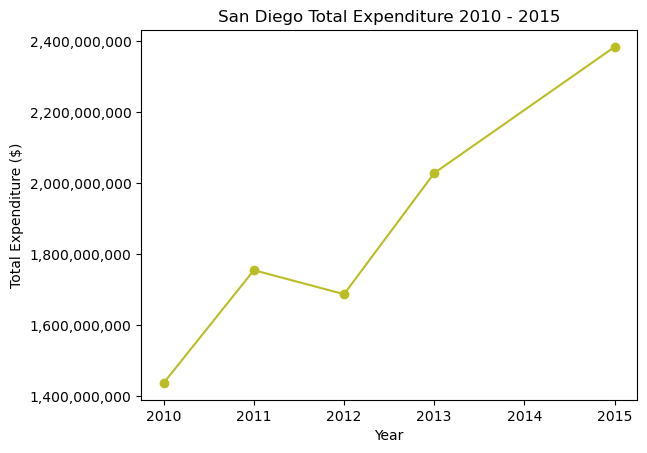

In [7]:
expenditure_over_years = plt.plot(san_diego['Year'], san_diego['Total Expenditure'], color="tab:olive", marker = 'o')

plt.title("San Diego Total Expenditure 2010 - 2015")
plt.xlabel("Year")
plt.ylabel("Total Expenditure ($)")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.savefig("Output/San_Diego_Total_Expenditure.png")
plt.show()





## Top 10 Counties in Total Expenditure
1. Cuyahoga, Ohio - 13,322,032,000
2. D.C., District of Columbia - 11,537,050,000
3. Los Angeles, California - 10,110,937,000
4. San Diego, California - 9,292,539,000
5. Travis, Texas - 7,750,047,000
6. Bexar, Texas - 7,507,264,000
7. Maricopa, Arizona - 7,311,961,000
8. Cook, Illinois - 6,272,777,000
9. Harris, Texas - 5,796,571,000
10. Clark, Nevada - 4,949,678,000

In [8]:
#plotting top 10 expense by county over year.

# Finding top ten
df_expend_sum = df.groupby(["State", "County"])["Total Expenditure"].sum().sort_values(ascending=False)
df_expend_sum = df_expend_sum.head(10)

# Assign state/county to list
df_expend_sum =  [f"{key[1]}, {key[0]}" for key in df_expend_sum.keys()]



# Create a pivot table dataframe with top 10 counties
pivoted = df.loc[[f"{row[1]['County']}, {row[1]['State']}" in df_expend_sum for row in df.iterrows()],
                 ["County", "State", "Total Expenditure", "Year"]]

#merge county and state into one column
pivoted['County'] = pivoted['County'] + ', ' + pivoted['State']

pivoted = pivoted.pivot(index="Year", columns="County", values="Total Expenditure")

pivoted


County,"BEXAR, Texas","CLARK, Nevada","COOK, Illinois","CUYAHOGA, Ohio","DISTRICT OF COLUMBIA, District of Columbia","HARRIS, Texas","LOS ANGELES, California","MARICOPA, Arizona","SAN DIEGO, California","TRAVIS, Texas"
Year,,,,,,,,,,
2010,1200895000,884665000,1135962000,2308568000,1940233000,910513000,1640877000,1173230000,1437610000,1088019000
2011,1482381000,890485000,1134721000,2446675000,2242043000,1028968000,1757027000,1343221000,1755045000,1725119000
2012,1330251000,873693000,1151572000,2546650000,2099018000,1043887000,1810193000,1338616000,1687511000,1892928000
2013,1573026000,1051792000,1362173000,2763705000,2295599000,1258362000,2258286000,1592681000,2028580000,1759581000
2015,1920711000,1249043000,1488349000,3256434000,2960157000,1554841000,2644554000,1864213000,2383793000,1284400000


C:\Users\nicdu\AppData\Local\Temp\ipykernel_12388\199662537.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


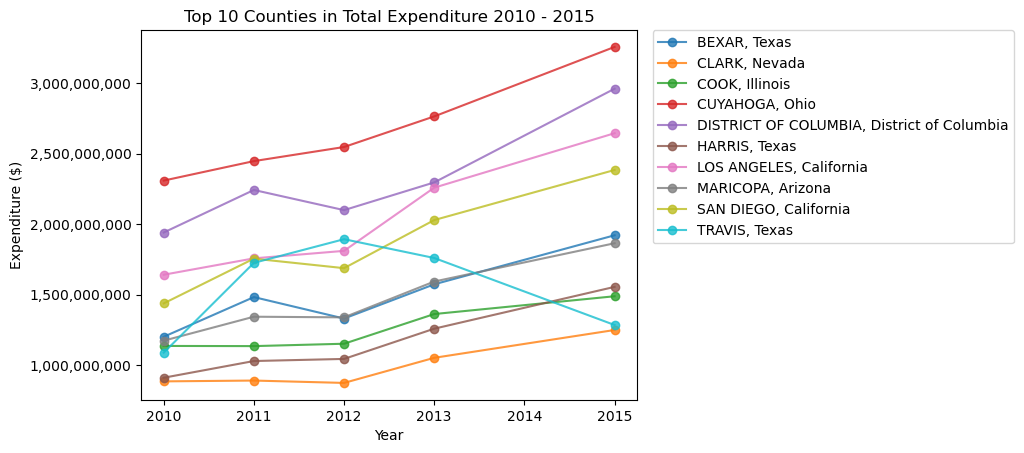

In [9]:
#plot 2010 - 2015
ax = pivoted.plot(legend=False, marker = 'o', alpha= 0.8)
ax.figure.legend(loc="upper right", bbox_to_anchor=(1.5,0.895))
ax.set_ylabel("Expenditure ($)")
ax.set_title("Top 10 Counties in Total Expenditure 2010 - 2015")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig("Output/Total_Expenditure_2010-2015_Top_10.png")
plt.show()

In [10]:
# Sum each year's total expediture by county
sum_of_expenditure = pivoted.sum()
expenditure = pd.DataFrame(sum_of_expenditure)
expenditure = expenditure.rename(columns={expenditure.columns[0] : "Sum of Total Expenditure"})

expenditure

,Sum of Total Expenditure
County,
"BEXAR, Texas",7507264000
"CLARK, Nevada",4949678000
"COOK, Illinois",6272777000
"CUYAHOGA, Ohio",13322032000
"DISTRICT OF COLUMBIA, District of Columbia",11537050000
"HARRIS, Texas",5796571000
"LOS ANGELES, California",10110937000
"MARICOPA, Arizona",7311961000
"SAN DIEGO, California",9292539000


C:\Users\nicdu\AppData\Local\Temp\ipykernel_12388\2458826967.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


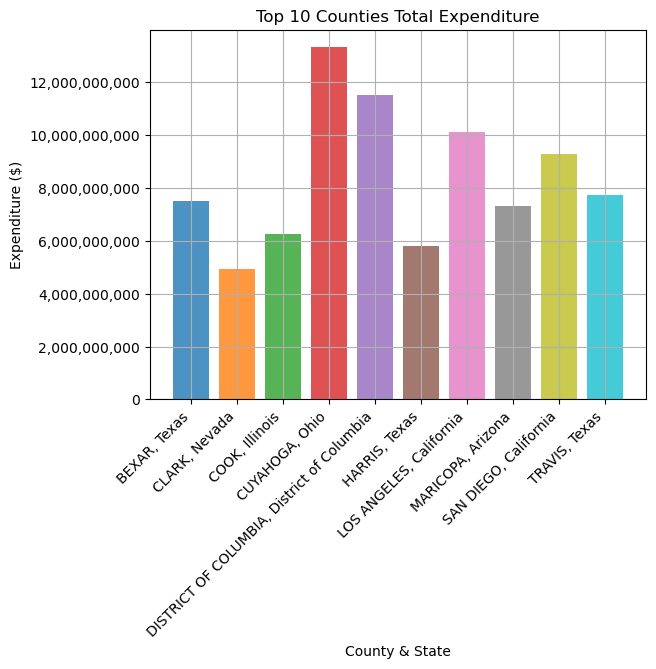

In [11]:
plt.bar(expenditure.index, expenditure["Sum of Total Expenditure"], color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
                                'tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:cyan'], align = "center", alpha = 0.8)

plt.title("Top 10 Counties Total Expenditure")
plt.ylabel("Expenditure ($)")
plt.xlabel("County & State")
plt.xticks(expenditure.index, rotation= 45, ha= 'right')
plt.grid()



# format y_ticks
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.savefig("Output/total_expenditure_top_10.png")
plt.show()



## Average Total Expenditure
The average expenditure in 2010 was 33,716,351.64 \
The average expenditure in 2011 was 38,130,585.35 \
The average expenditure in 2012 was 37,369,533.21 \
The average expenditure in 2013 was 44,340,992.55 \
                    2014 - No Data \
The average expenditure in 2015 was 51,912,415.40 \
The average expenditure over 5 years was 163,939,945.83

In [12]:
# Create Df for each year (don't have data for 2014)
df_2010 = df.loc[df["Year"] == 2010]
df_2011 = df.loc[df["Year"] == 2011]
df_2012 = df.loc[df["Year"] == 2012]
df_2013 = df.loc[df["Year"] == 2013]
df_2015 = df.loc[df["Year"] == 2015]

In [13]:
# Find average total expenditure for each year
average_expend_2010 = round(df_2010["Total Expenditure"].mean(), 2)
average_expend_2011 = round(df_2011["Total Expenditure"].mean(), 2)
average_expend_2012 = round(df_2012["Total Expenditure"].mean(), 2)
average_expend_2013 = round(df_2013["Total Expenditure"].mean(), 2)
average_expend_2015 = round(df_2015["Total Expenditure"].mean(), 2)

# Average Total Expenditure over the 5 year period
overall_expend_average = (average_expend_2010 + average_expend_2011 + average_expend_2012
                          + average_expend_2013 + average_expend_2015 /
                          5)

print(f"The average expenditure in 2010 was ${average_expend_2010:,}")
print(f"The average expenditure in 2011 was ${average_expend_2011:,}")
print(f"The average expenditure in 2012 was ${average_expend_2012:,}")
print(f"The average expenditure in 2013 was ${average_expend_2013:,}")
print(f"The average expenditure in 2015 was ${average_expend_2015:,}")
print(f"The average expenditure over 5 years was ${overall_expend_average:,}")


The average expenditure in 2010 was $33,716,351.64
The average expenditure in 2011 was $38,130,585.35
The average expenditure in 2012 was $37,369,533.21
The average expenditure in 2013 was $44,340,992.55
The average expenditure in 2015 was $51,912,415.4
The average expenditure over 5 years was $163,939,945.83


In [14]:

d = {"Average Total Expenditure": [average_expend_2010,
                             average_expend_2011,
                             average_expend_2012,
                             average_expend_2013,
                             average_expend_2015],
    "Year": [2010, 2011, 2012, 2013, 2015]} 
    
i = [0, 1, 2, 3, 4]
average_expend = pd.DataFrame(data= d, index=i)

average_expend

,Average Total Expenditure,Year
0,33716351.64,2010
1,38130585.35,2011
2,37369533.21,2012
3,44340992.55,2013
4,51912415.40,2015


C:\Users\nicdu\AppData\Local\Temp\ipykernel_12388\436104436.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


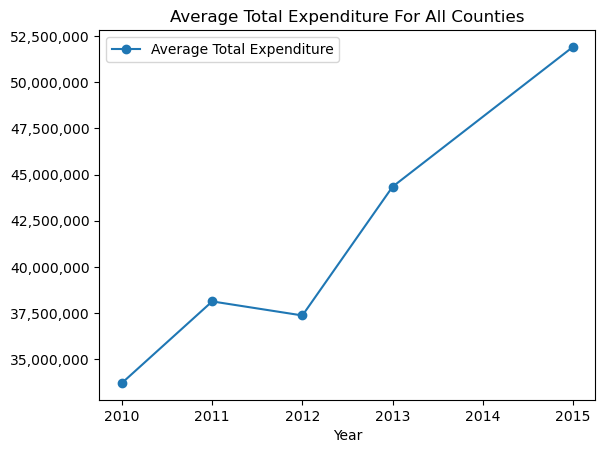

In [15]:
average_expend.plot(x="Year", y="Average Total Expenditure", marker = 'o')
plt.title("Average Total Expenditure For All Counties")


#formatting
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig("Output/Country_Average_Overall_Expenditure.png")
plt.show()


## Program Totals

Most Expensive program: Compensation & Pension
Least Expensive program: Loan Guaranty

In [16]:
#2010 program costs
Comp_2010 = df_2010["Compensation & Pension"].sum()
construct_2010 = df_2010["Construction"].sum()
Education_2010 = df_2010["Education & Vocational Rehabilitation/ Employment"].sum()
Loan_2010 = df_2010["Loan Guaranty"].sum()
Operating_2010 = df_2010["General Operating Expenses"].sum()
Insurance_2010 = df_2010["Insurance & Indemnities"].sum()
Medical_2010 = df_2010["Medical Care"].sum()

#2011 program costs
Comp_2011 = df_2011["Compensation & Pension"].sum()
construct_2011 = df_2011["Construction"].sum()
Education_2011 = df_2011["Education & Vocational Rehabilitation/ Employment"].sum()
Loan_2011 = df_2011["Loan Guaranty"].sum()
Operating_2011 = df_2011["General Operating Expenses"].sum()
Insurance_2011 = df_2011["Insurance & Indemnities"].sum()
Medical_2011 = df_2011["Medical Care"].sum()

#2012 program costs
Comp_2012 = df_2012["Compensation & Pension"].sum()
construct_2012 = df_2012["Construction"].sum()
Education_2012 = df_2012["Education & Vocational Rehabilitation/ Employment"].sum()
Loan_2012 = df_2012["Loan Guaranty"].sum()
Operating_2012 = df_2012["General Operating Expenses"].sum()
Insurance_2012 = df_2012["Insurance & Indemnities"].sum()
Medical_2012 = df_2012["Medical Care"].sum()

#2013 program costs
Comp_2013 = df_2013["Compensation & Pension"].sum()
construct_2013 = df_2013["Construction"].sum()
Education_2013 = df_2013["Education & Vocational Rehabilitation/ Employment"].sum()
Loan_2013 = df_2013["Loan Guaranty"].sum()
Operating_2013 = df_2013["General Operating Expenses"].sum()
Insurance_2013 = df_2013["Insurance & Indemnities"].sum()
Medical_2013 = df_2013["Medical Care"].sum()

#2015 program costs
Comp_2015 = df_2015["Compensation & Pension"].sum()
construct_2015 = df_2015["Construction"].sum()
Education_2015 = df_2015["Education & Vocational Rehabilitation/ Employment"].sum()
Loan_2015 = df_2015["Loan Guaranty"].sum()
Operating_2015 = df_2015["General Operating Expenses"].sum()
Insurance_2015 = df_2015["Insurance & Indemnities"].sum()
Medical_2015 = df_2015["Medical Care"].sum()



In [17]:
d = {"Total Cost 2010":[Comp_2010,construct_2010,Education_2010,Loan_2010,Operating_2010,Insurance_2010,Medical_2010],
    "Total Cost 2011":[Comp_2011,construct_2011,Education_2011,Loan_2011,Operating_2011,Insurance_2011,Medical_2011],
    "Total Cost 2012": [Comp_2012,construct_2012,Education_2012,Loan_2012,Operating_2012,Insurance_2012,Medical_2012],
    "Total Cost 2013": [Comp_2013,construct_2013,Education_2013,Loan_2013,Operating_2013,Insurance_2013,Medical_2013],
    "Total Cost 2015": [Comp_2015,construct_2015,Education_2015,Loan_2015,Operating_2015,Insurance_2015,Medical_2015]}


i = ["Compensation & Pension", "Construction", "Education & Vocational Rehabilitation/ Employment",
    "Loan Guaranty", "General Operating Expenses", "Insurance & Indemnities", "Medical Care"]

totals = pd.DataFrame(d, i)


totals

,Total Cost 2010,Total Cost 2011,Total Cost 2012,Total Cost 2013,Total Cost 2015
Compensation & Pension,47784630000,57596479000,53243133000,63574729000,75787362000
Construction,1618835000,1813313000,1538320000,1330056000,1827764000
Education & Vocational Rehabilitation/ Employment,8260092000,10630399000,10424646000,11949185000,13408405000
Loan Guaranty,804064000,1391866000,1588712000,1385063000,865419000
General Operating Expenses,6100624000,6652415000,6444580000,6889918000,8055571000
Insurance & Indemnities,1694238000,1687514000,1643976000,1699602000,1704548000
Medical Care,42371607000,43084780000,45521300000,55993794000,65560844000


C:\Users\nicdu\AppData\Local\Temp\ipykernel_12388\3007929181.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


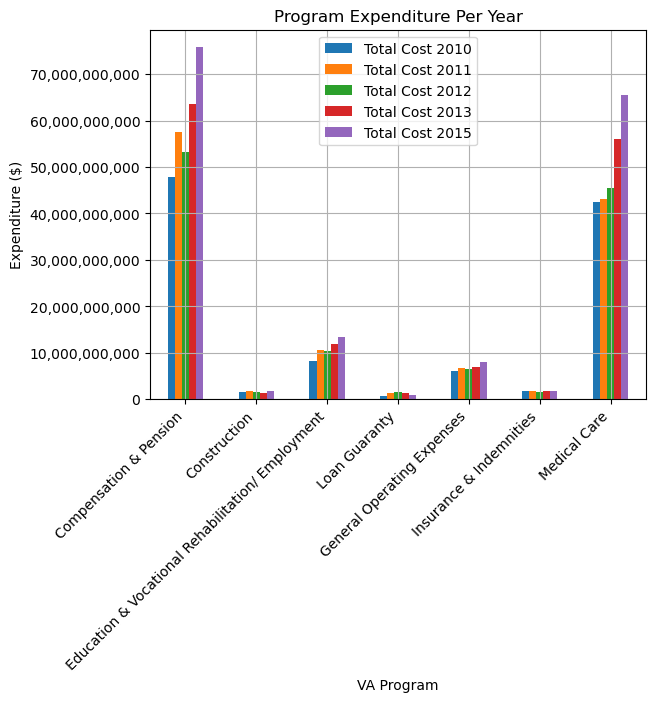

In [20]:
ax = totals.plot.bar()
ax.set_title("Program Expenditure Per Year")
ax.set_ylabel("Expenditure ($)")
ax.set_xlabel("VA Program")
ax.set_xticklabels(totals.index, rotation= 45, ha= 'right')


#formatting
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.grid()
plt.savefig("Output/Program_Expenditure_Per_Year.png")
plt.show()

## VA Yearly Expenses

2010: 108,634,090,000 \
2011: 122,856,766,000 \
2012: 120,404,667,000 \
2013: 142,822,347,000 \
2014: No Data \
2015: 167,209,913,000

In [21]:
# Total VA Expenses per year
totals.sum()

Total Cost 2010    108634090000
Total Cost 2011    122856766000
Total Cost 2012    120404667000
Total Cost 2013    142822347000
Total Cost 2015    167209913000
dtype: int64